<a href="https://colab.research.google.com/github/natandreli/ai_project/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Functions used

In [2]:
# Function for performing the correlation matrix
def get_corr_matrix(group, dataset):
    corr_matrix = dataset[group].corr()
    plt.figure(figsize = (10, 10))
    ax = sns.heatmap(corr_matrix, cmap = 'RdBu_r', center = 0.0)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 8, rotation = 0)
    plt.show()
    return corr_matrix

In [3]:
# Function to summarize the columns
def reduce_columns(corr_matrix, dataset):
    use = []
    corr_pairs = np.where(np.triu(np.abs(corr_matrix) >= 0.7, k=1))
    corr_vars = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*corr_pairs)]

    groups = {}
    for pair in corr_vars:
        corr_value = np.abs(corr_matrix.loc[pair[0], pair[1]])
        for col in pair:
            if col not in groups or groups[col][1] < corr_value:
                groups[col] = (pair, corr_value)
    
    grps = []
    for col, (pair, _) in groups.items():
        found = False
        for group in grps:
            if pair[0] in group or pair[1] in group:
                group.update(pair)
                found = True
                break
        if not found:
            grps.append(set(pair))

    grps = [tuple(s) for s in grps]
            
    for group in grps:
        mx = 0; vx = group[0]
        for column in group:
            n = dataset[column].nunique()
            if n>mx:
                mx = n
                vx = column
        use.append(vx)
    
    delete = list(corr_matrix.columns)
    intersection = set(use) & set(delete)

    for column in intersection:
        delete.remove(column)

    print(f'Delete columns: {delete}\n\nUse columns: {use}')
    return(delete)

## LOAD DATA

In [4]:
# Train datasets
train_t = pd.read_csv('train_transaction.csv', index_col='TransactionID')
train_i = pd.read_csv('train_identity.csv', index_col='TransactionID')
train = pd.merge(train_t, train_i, on = 'TransactionID', how = 'left')

# Test datasets
test_t = pd.read_csv('test_transaction.csv', index_col='TransactionID')
test_i = pd.read_csv('test_identity.csv', index_col='TransactionID')
fix = {o:n for o, n in zip(test_i.columns, train_i.columns)}
test_i.rename(columns = fix, inplace=True)
test = pd.merge(test_t, test_i, on = 'TransactionID', how = 'left')

# Target
train_y = train['isFraud'].copy()

# Shape
print(f'Train shape: {train.shape}\nTest shape: {test.shape}')

Train shape: (590540, 433)
Test shape: (506691, 432)


## Data cleaning

### Related columns by NaN values

In [15]:
columns = list(train.columns)
nan = train.isna()
nan_groups = {}

for column in columns:
    aux = nan[column].sum()
    if aux in nan_groups:
        nan_groups[aux].append(column)
    else:
        nan_groups[aux]=[column]

for num_nan, group in nan_groups.items():
    print(f'Number of NaN values = {num_nan} \nGroup: {group}\n')

Number of NaN values = 0 
Group: ['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

Number of NaN values = 8933 
Group: ['card2']

Number of NaN values = 1565 
Group: ['card3']

Number of NaN values = 1577 
Group: ['card4']

Number of NaN values = 4259 
Group: ['card5']

Number of NaN values = 1571 
Group: ['card6']

Number of NaN values = 65706 
Group: ['addr1', 'addr2']

Number of NaN values = 352271 
Group: ['dist1']

Number of NaN values = 552913 
Group: ['dist2']

Number of NaN values = 94456 
Group: ['P_emaildomain']

Number of NaN values = 453249 
Group: ['R_emaildomain']

Number of NaN values = 1269 
Group: ['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']

Number of NaN values = 280797 
Group: ['D2']

Number of NaN values = 262878 
Group: ['D3']

Number of NaN values = 168922 
Group: ['D4']

Number of NaN values = 309841 
Grou

### Column reduce

In [16]:
num_deleted_columns = 0

#### V1 - V11, D11

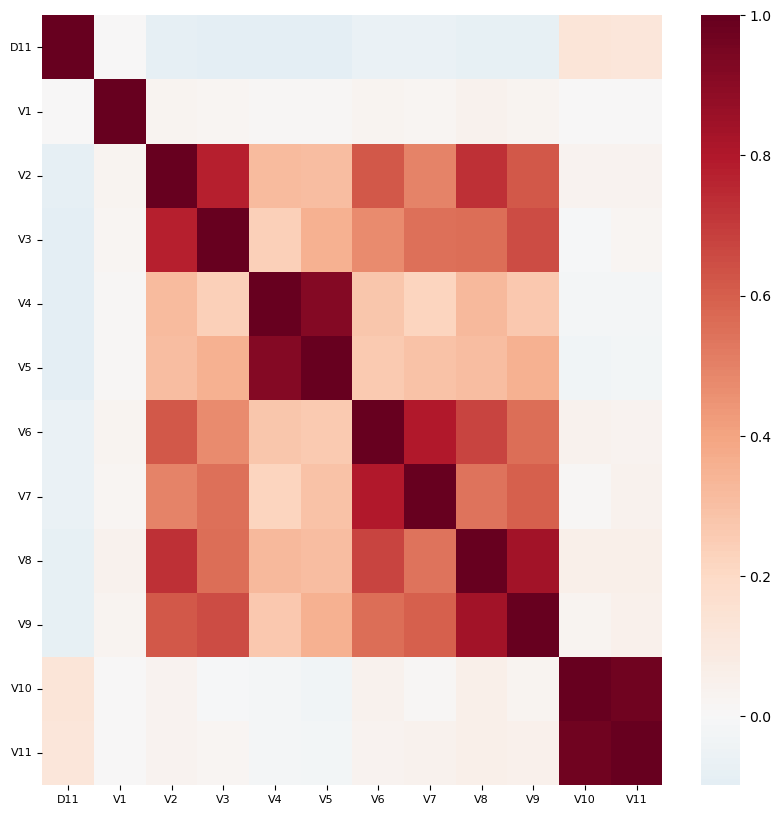

In [17]:
corr_matrix = get_corr_matrix(nan_groups[279287], train)

In [18]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['D11', 'V1', 'V2', 'V5', 'V7', 'V9', 'V10']

Use columns: ['V3', 'V8', 'V4', 'V6', 'V11']


#### V12 - V34

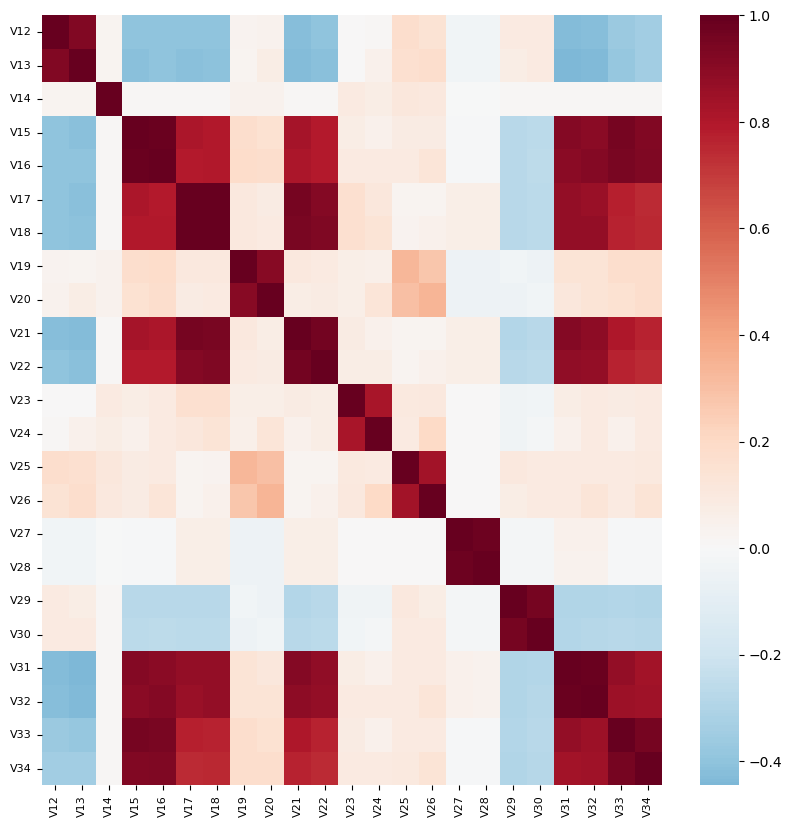

In [19]:
corr_matrix = get_corr_matrix(nan_groups[76073], train)

In [20]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V12', 'V14', 'V15', 'V18', 'V19', 'V21', 'V23', 'V25', 'V27', 'V29', 'V31', 'V33']

Use columns: ['V13', 'V16', 'V17', 'V22', 'V32', 'V34', 'V20', 'V24', 'V26', 'V28', 'V30']


#### V35 - V52

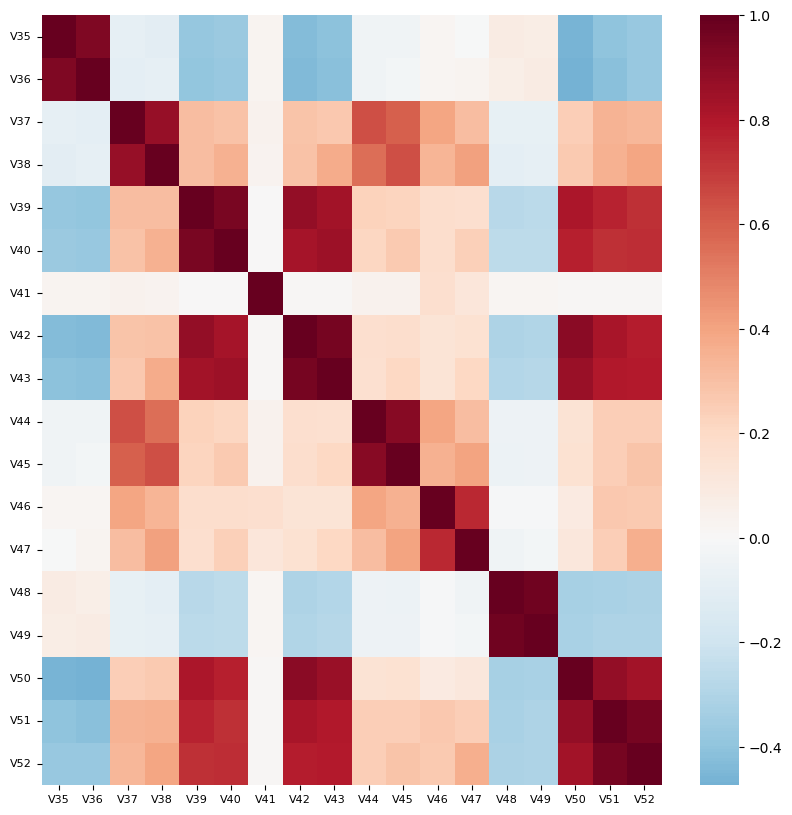

In [21]:
corr_matrix = get_corr_matrix(nan_groups[168969], train)

In [22]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V35', 'V37', 'V39', 'V41', 'V42', 'V45', 'V46', 'V48', 'V50', 'V51']

Use columns: ['V36', 'V38', 'V40', 'V43', 'V52', 'V44', 'V47', 'V49']


#### V53 - V74

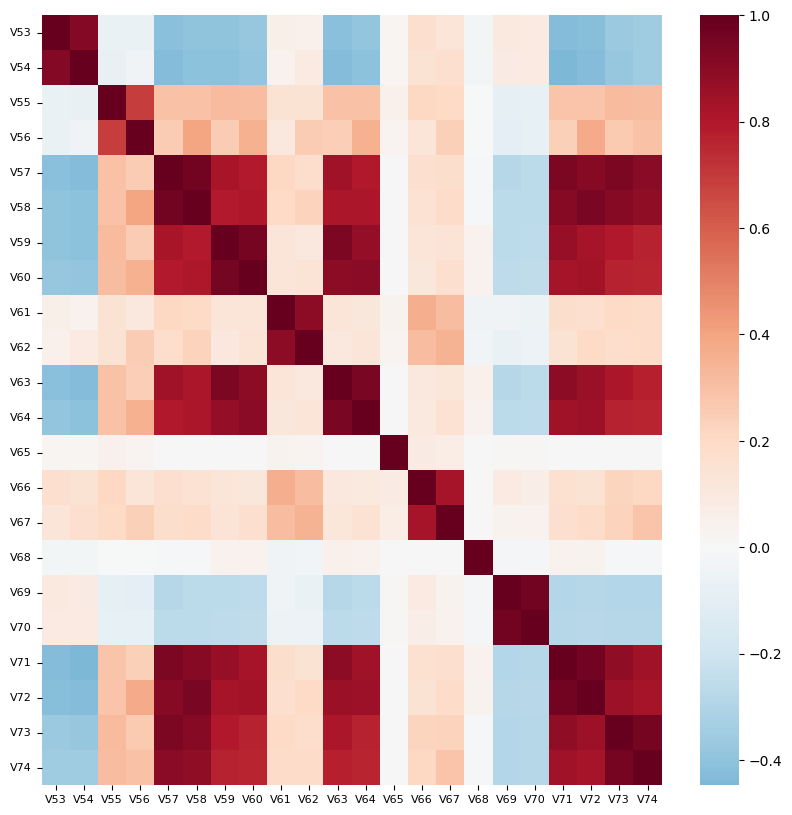

In [23]:
corr_matrix = get_corr_matrix(nan_groups[77096], train)

In [24]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V53', 'V55', 'V56', 'V57', 'V60', 'V61', 'V63', 'V65', 'V66', 'V68', 'V69', 'V71', 'V73']

Use columns: ['V54', 'V58', 'V59', 'V64', 'V72', 'V74', 'V62', 'V67', 'V70']


#### V75 - V94

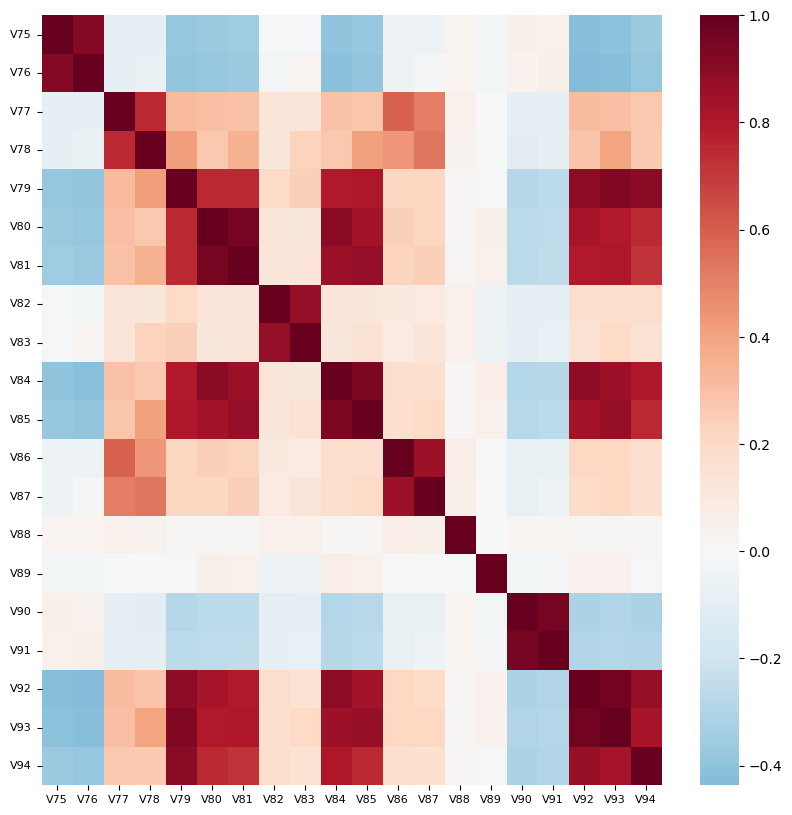

In [25]:
corr_matrix = get_corr_matrix(nan_groups[89164], train)

In [26]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V75', 'V77', 'V79', 'V81', 'V83', 'V85', 'V87', 'V88', 'V89', 'V90', 'V93', 'V94']

Use columns: ['V76', 'V78', 'V92', 'V80', 'V84', 'V82', 'V86', 'V91']


#### V95 - V137

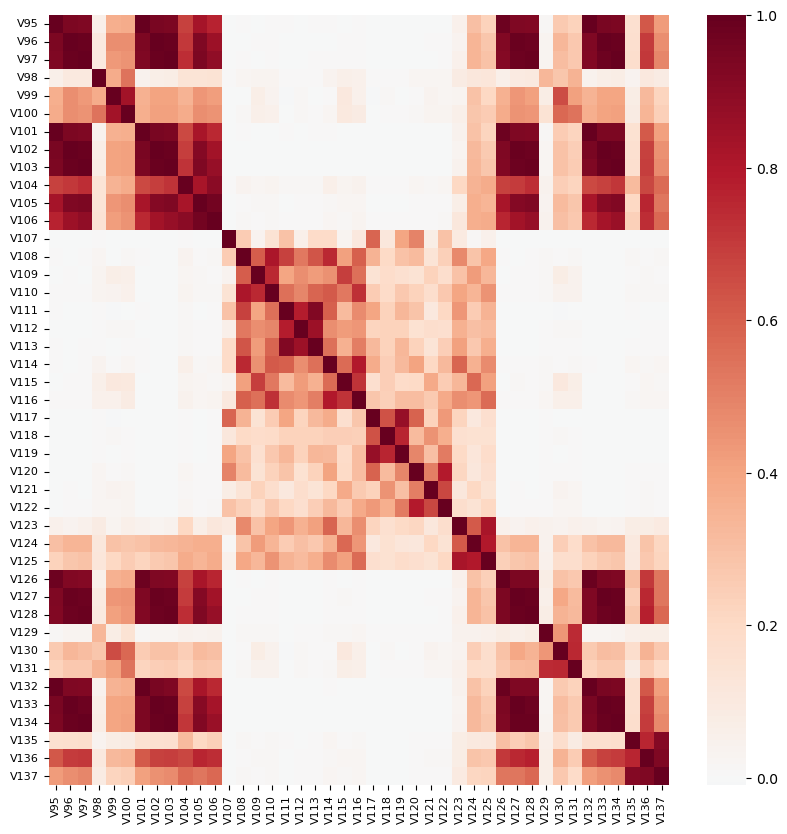

In [27]:
corr_matrix = get_corr_matrix(nan_groups[314], train)

In [28]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V95', 'V96', 'V97', 'V98', 'V100', 'V101', 'V102', 'V103', 'V104', 'V106', 'V107', 'V108', 'V109', 'V111', 'V112', 'V114', 'V116', 'V118', 'V119', 'V121', 'V122', 'V123', 'V125', 'V129', 'V131', 'V135', 'V137']

Use columns: ['V132', 'V133', 'V134', 'V105', 'V126', 'V127', 'V128', 'V136', 'V99', 'V110', 'V115', 'V113', 'V117', 'V120', 'V124', 'V130']


#### V138 ~ V163

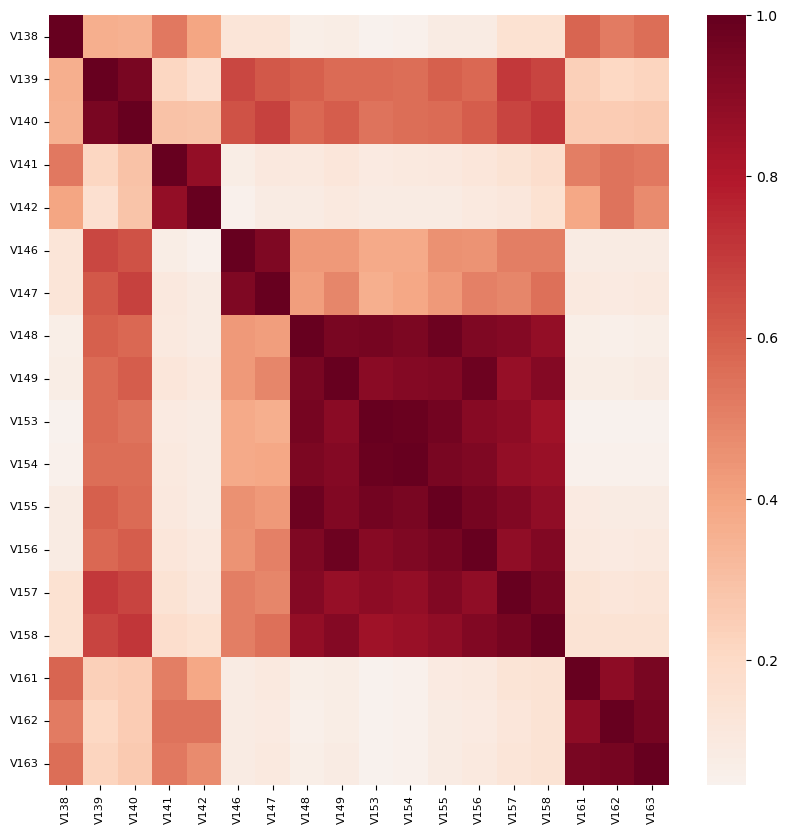

In [29]:
corr_matrix = get_corr_matrix(nan_groups[508595], train)

In [30]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V138', 'V140', 'V141', 'V146', 'V148', 'V149', 'V154', 'V157', 'V161', 'V163']

Use columns: ['V139', 'V158', 'V142', 'V147', 'V155', 'V156', 'V153', 'V162']


#### V143 ~ V166

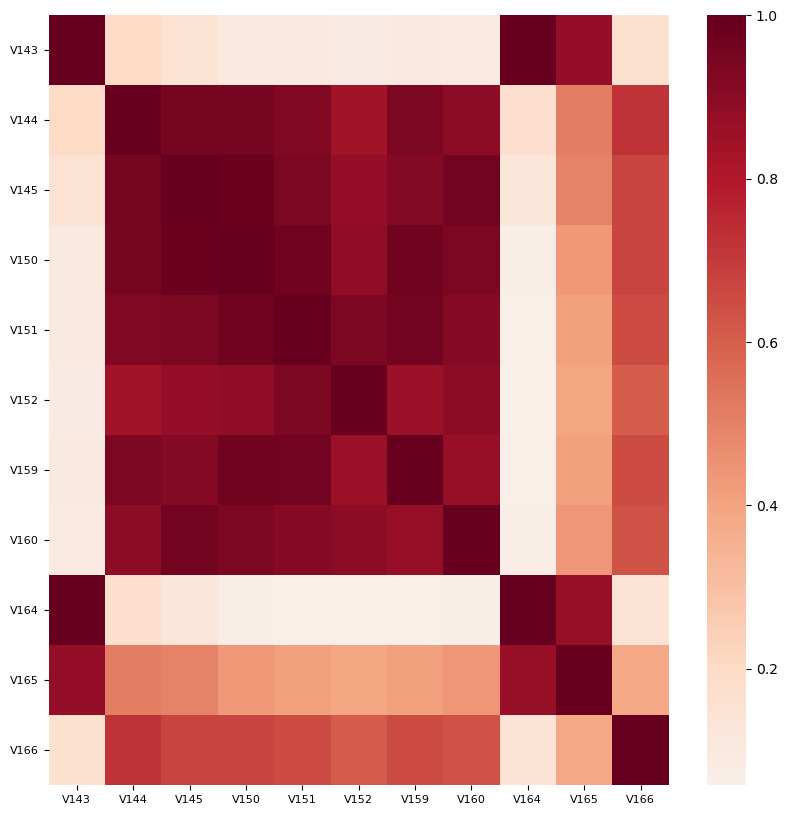

In [31]:
corr_matrix = get_corr_matrix(nan_groups[508589], train)

In [32]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V143', 'V144', 'V145', 'V150', 'V151', 'V152', 'V159', 'V164', 'V166']

Use columns: ['V165', 'V160']


#### V167 ~ V216

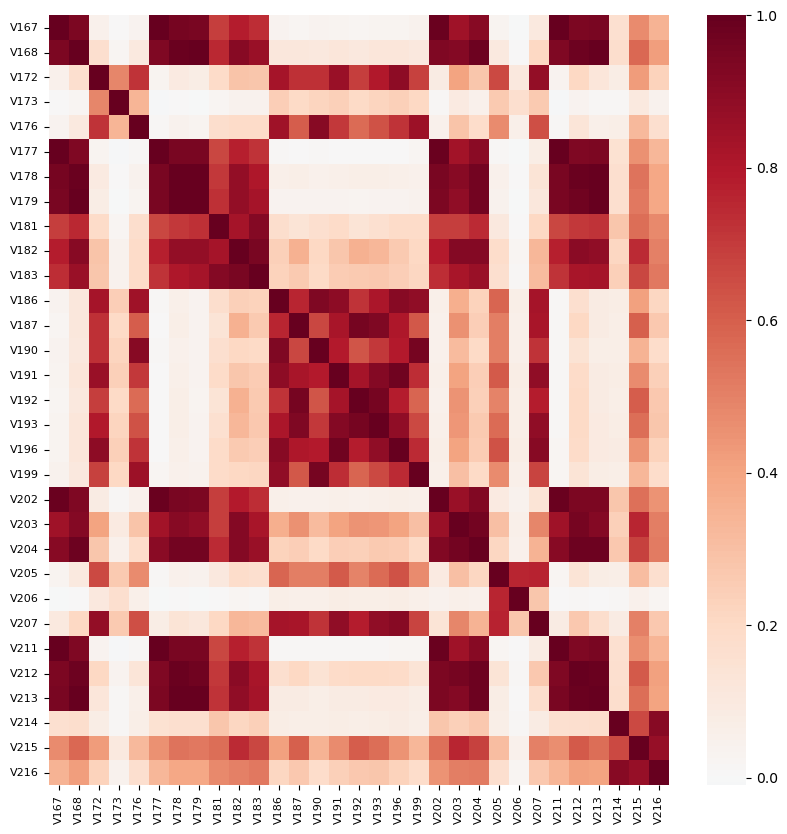

In [33]:
corr_matrix = get_corr_matrix(nan_groups[450909], train)

In [34]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V167', 'V168', 'V172', 'V173', 'V177', 'V178', 'V179', 'V181', 'V183', 'V186', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V204', 'V205', 'V206', 'V214', 'V216']

Use columns: ['V211', 'V213', 'V212', 'V182', 'V202', 'V203', 'V207', 'V176', 'V187', 'V215']


#### V169 ~ 210

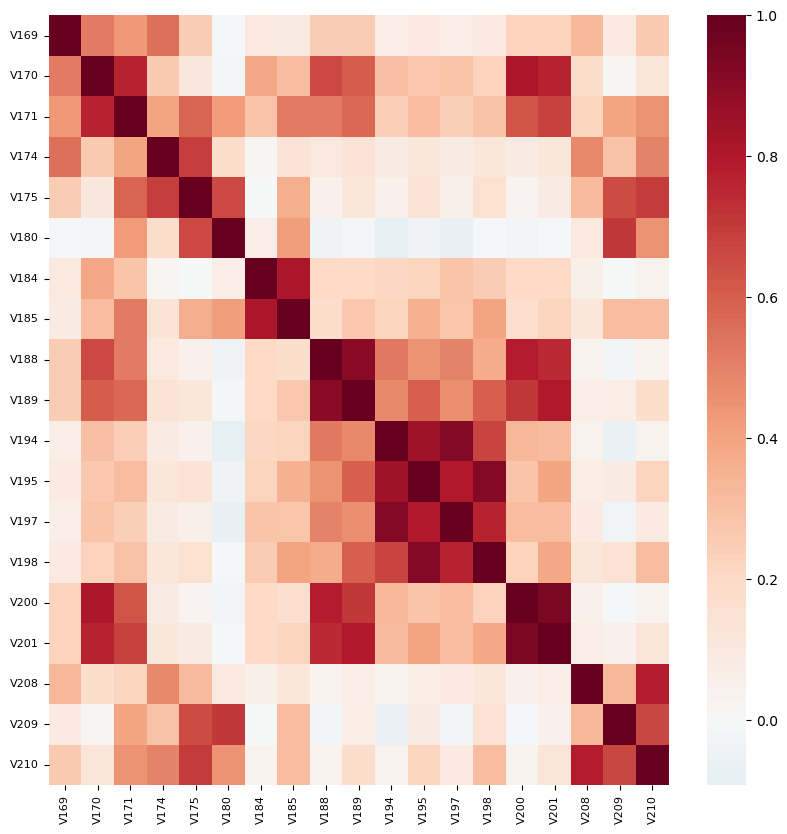

In [35]:
corr_matrix = get_corr_matrix(nan_groups[450721], train)

In [36]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V169', 'V170', 'V174', 'V175', 'V180', 'V184', 'V189', 'V194', 'V195', 'V200', 'V201', 'V208']

Use columns: ['V171', 'V209', 'V185', 'V188', 'V197', 'V198', 'V210']


#### V217 ~ V278

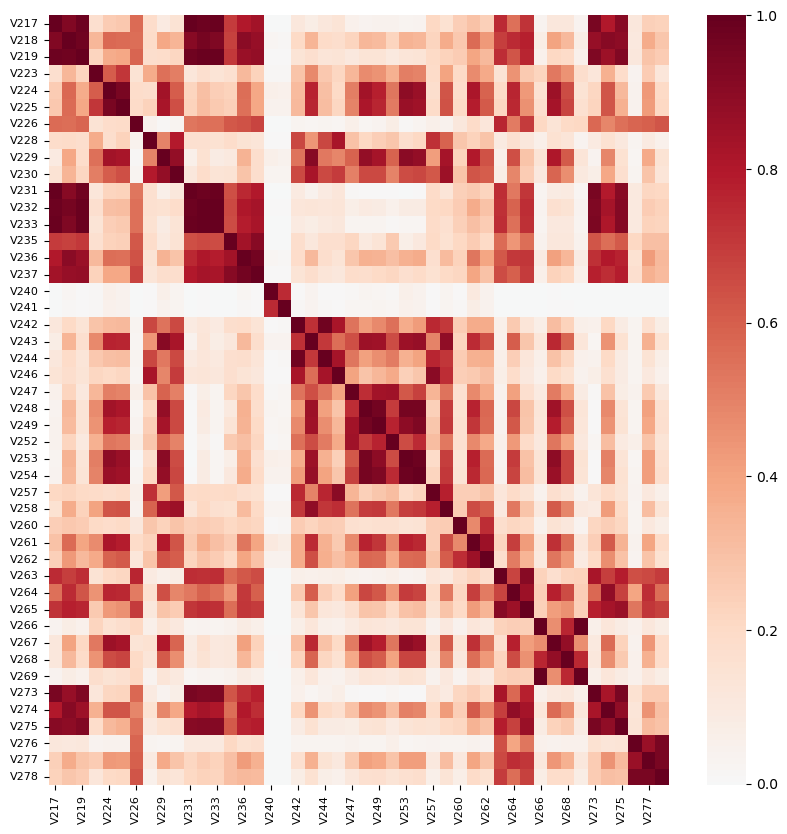

In [37]:
corr_matrix = get_corr_matrix(nan_groups[460110], train)

In [38]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V217', 'V218', 'V219', 'V223', 'V225', 'V226', 'V230', 'V231', 'V232', 'V233', 'V235', 'V237', 'V241', 'V242', 'V243', 'V246', 'V247', 'V249', 'V253', 'V254', 'V257', 'V258', 'V260', 'V262', 'V263', 'V268', 'V269', 'V273', 'V274', 'V276', 'V278']

Use columns: ['V275', 'V264', 'V236', 'V265', 'V224', 'V229', 'V248', 'V267', 'V261', 'V228', 'V240', 'V244', 'V252', 'V277', 'V266']


#### V220 ~ V272

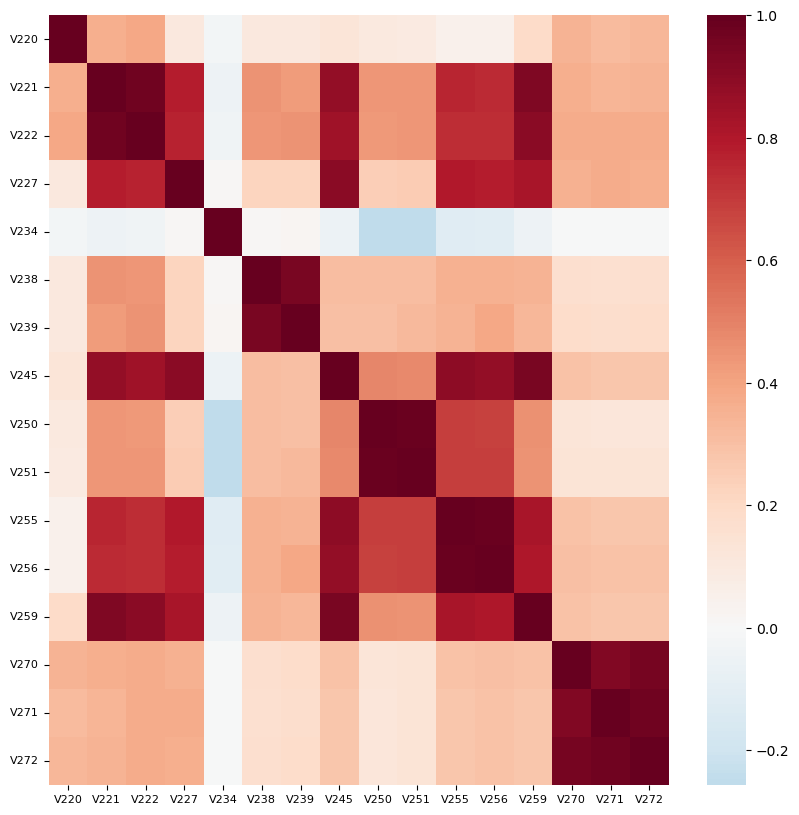

In [39]:
corr_matrix = get_corr_matrix(nan_groups[449124], train)

In [40]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V220', 'V222', 'V227', 'V234', 'V239', 'V245', 'V250', 'V255', 'V270', 'V272']

Use columns: ['V221', 'V259', 'V256', 'V238', 'V251', 'V271']


#### V279 ~ V321

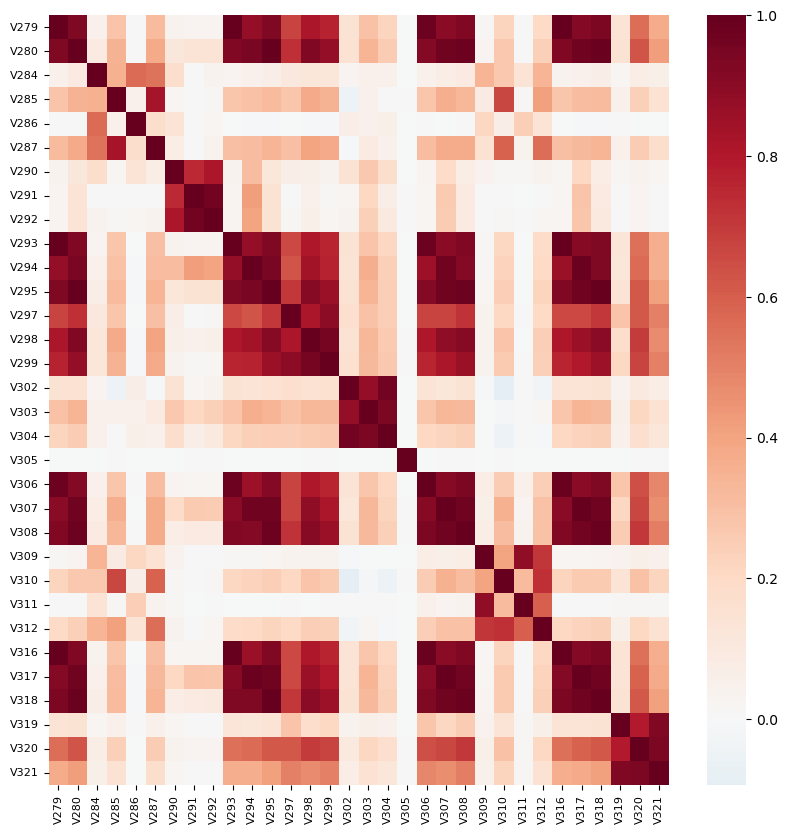

In [41]:
corr_matrix = get_corr_matrix(nan_groups[12], train)

In [42]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V279', 'V280', 'V284', 'V286', 'V287', 'V290', 'V292', 'V293', 'V294', 'V295', 'V297', 'V299', 'V302', 'V304', 'V305', 'V311', 'V312', 'V317', 'V319', 'V321']

Use columns: ['V316', 'V318', 'V307', 'V298', 'V306', 'V308', 'V285', 'V291', 'V303', 'V320', 'V309', 'V310']


#### V281 ~ V315, D1

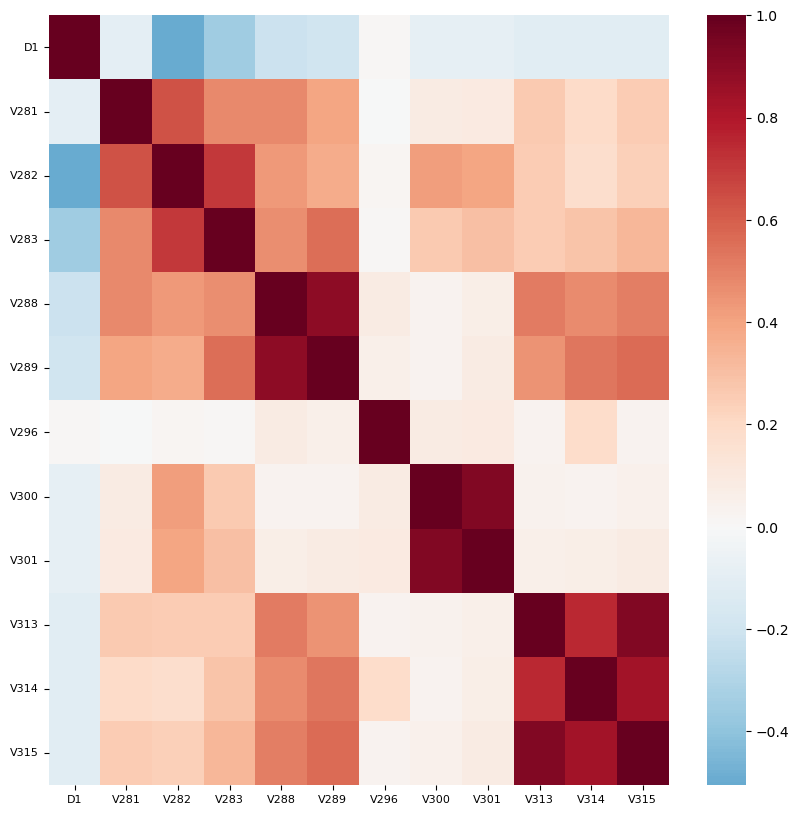

In [43]:
corr_matrix = get_corr_matrix(nan_groups[1269], train)

In [44]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['D1', 'V281', 'V282', 'V288', 'V296', 'V300', 'V313', 'V315']

Use columns: ['V283', 'V289', 'V301', 'V314']


#### V322 ~ V339

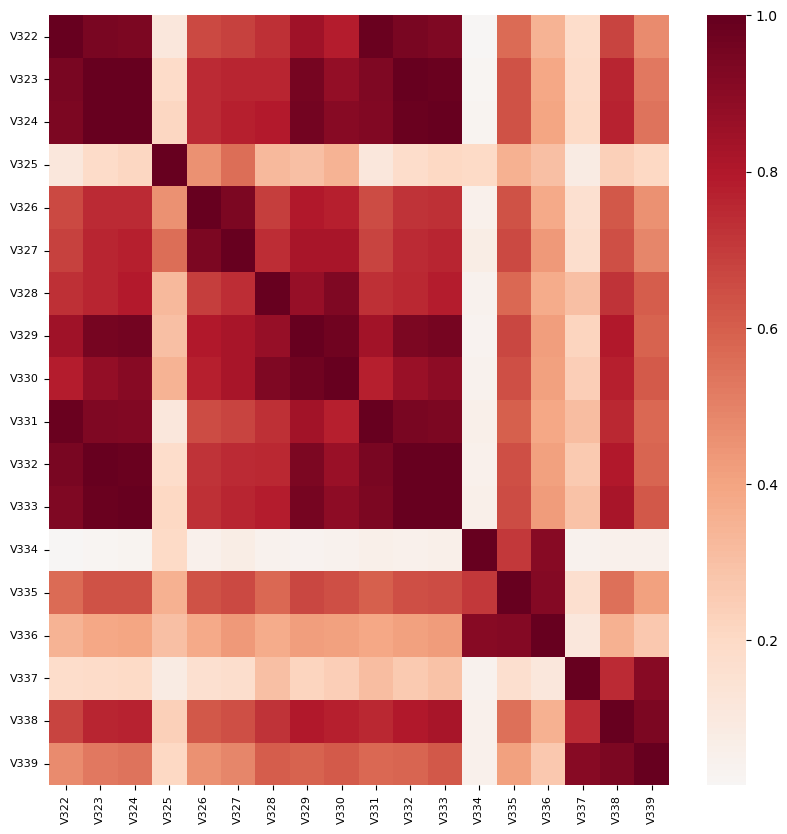

In [45]:
corr_matrix = get_corr_matrix(nan_groups[508189], train)

In [46]:
delete = reduce_columns(corr_matrix, train)
num_deleted_columns += len(delete)
train = train.drop(columns = delete)

Delete columns: ['V322', 'V323', 'V324', 'V325', 'V327', 'V328', 'V330', 'V333', 'V334', 'V336', 'V337', 'V339']

Use columns: ['V331', 'V332', 'V329', 'V326', 'V338', 'V335']


#### Total number of columns removed and new train dataset shape

In [47]:
print(f'Total number of columns removed: {num_deleted_columns}')

Total number of columns removed: 214


In [48]:
print(f'Train shape: {train.shape}')

Train shape: (590540, 219)


#### Correlation of reduced V columns

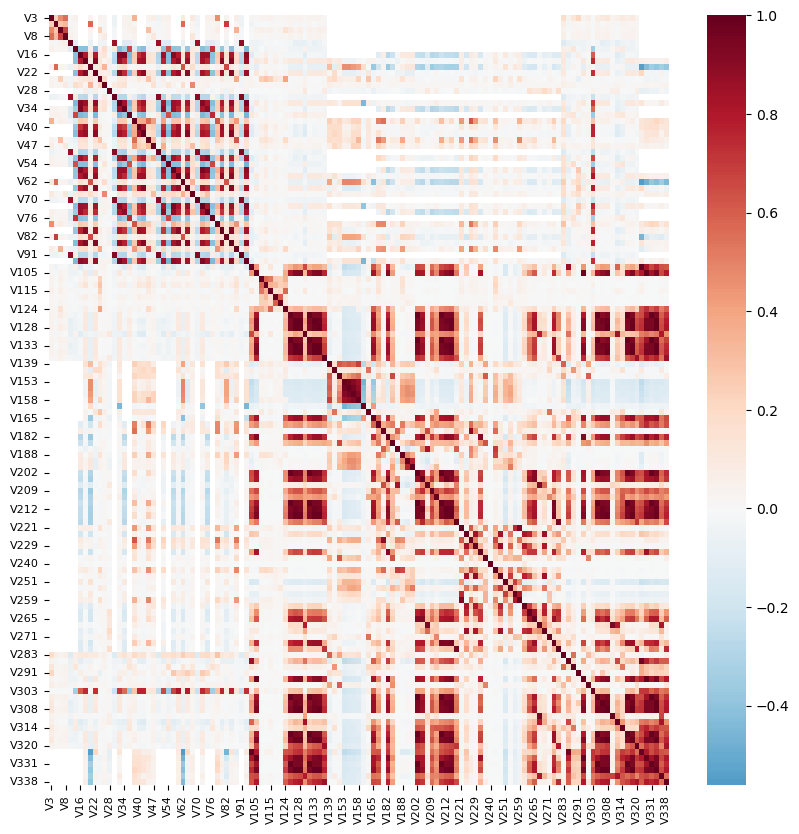

In [49]:
corr_matrix = get_corr_matrix(train.loc[:, 'V3':'V338'].columns, train)